In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import Laffer

filename = "hw03"

doc = Homework(
    title = r"Econ 310 Week 3 Homework",
    due_date = r"Tuesday 9/17"
)


In [2]:
df = pd.read_csv("Laffer_examples.csv")
params = dict(df.sample(1,random_state=2).reset_index(drop=True).loc[0])
prob = Laffer(params)
print(params)

{'N': 120, 'M': 120, 'alpha': 14, 'tp': 0.25, 'p': '$$ p = \\frac{ 14 }{ 2 - t } $$', 'Q': '$$ Q = 1,680 \\left( \\frac{ 1-t }{ 2 - t } \\right) $$'}


In [3]:
# Baseline market

setup = prob.sreq.setup()

questions = fr"""
\begin{{enumerate}}[a.]
\item Write down the consumer's first order condition.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Find the equilibrium price and total quantity traded.
\item Calculate total consumer utility and total firm profit in the equilibrium.
\end{{enumerate}}
"""

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(setup))
print(questions)
print("\nSolutions, no tax:")
print(prob.sreq.sol)

<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Write down the consumer's first order condition.
\item Write down the firm's first order condition.
\item Write down the market equilibrium condition.
\item Find the equilibrium price and total quantity traded.
\item Calculate total consumer utility and total firm profit in the equilibrium.
\end{enumerate}


Solutions, no tax:
{'Q': 840.0, 'p': 7.0, 'qd': 7.0, 'qs': 7.0, 'c': 51.0, 'revenue': 49.0, 'cost': 24.5, 'profit': 24.5, 'total_profit': 2940.0, 'utility': 124.5, 'total_utility': 14940.0, 'total_surplus': 17880.0}


In [4]:
# With tax

setup = fr"""
Take the setup from problem 1. Suppose an ad valorem tax rate of {prob.params['tp']*100:.0f}\% is placed on producers.
"""

questions = fr"""
\begin{{enumerate}}[a.]
\item Find the equilibrium price and total quantity traded under the tax.
\item Calculate the tax revenue raised by the tax.
\item Calculate the deadweight loss caused by the tax.
\end{{enumerate}}
"""

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(setup))
print(questions)
print("\nSolutions:")
print(prob.av.sol)

<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Find the equilibrium price and total quantity traded under the tax.
\item Calculate the tax revenue raised by the tax.
\item Calculate the deadweight loss caused by the tax.
\end{enumerate}


Solutions:
{'Q': 720.0, 'p': 8.0, 'qd': 6.0, 'qs': 6.0, 'c': 52.0, 'revenue': 36.0, 'cost': 18.0, 'profit': 18.0, 'total_profit': 2160.0, 'utility': 118.0, 'total_utility': 14160.0, 'tax_revenue': 1440.0, 'total_surplus': 17760.0, 'DWL': 120.0}


In [5]:
# Lump sum

setup = fr"""
Take the setup from problem 2. Suppose instead of using an ad valorem tax, a lump sum tax is imposed on the producers in order to raise the same total revenue.
"""

questions = fr"""
\begin{{enumerate}}[a.]
\item What amount of tax must be charged to each producer, in order to raise the same revenue as in problem 2?
\item Find the equilibrium price, total quantity, and total surplus under the lump sum tax. (Hint: Based on the lump sum principle, you shouldn't have to solve any new equations.)
\end{{enumerate}}
"""

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(setup))
print(questions)


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item What amount of tax must be charged to each producer, in order to raise the same revenue as in problem 2?
\item Find the equilibrium price, total quantity, and total surplus under the lump sum tax. (Hint: Based on the lump sum principle, you shouldn't have to solve any new equations.)
\end{enumerate}



In [6]:
# Laffer curve

setup = fr"""
Return to the setup from problem 1. An ad valorem tax rate of $t$ is charged to the producers.
"""

questions = fr"""
\begin{{enumerate}}[a.]
\item Prove that the equilibrium price is equal to: 
{prob.formula_p()}
\item Prove that the equilibrium quantity is equal to: 
{prob.formula_q()}
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{{enumerate}}
"""

latex = "\\begin{q}\n" + setup + questions + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(setup))
print(questions)


<IPython.core.display.Latex object>


\begin{enumerate}[a.]
\item Prove that the equilibrium price is equal to: 
$$ p = \frac{ 14 }{ 2 - t } $$
\item Prove that the equilibrium quantity is equal to: 
$$ Q = 1,680 \left( \frac{ 1-t }{ 2 - t } \right) $$
\item Use Excel or any other software to plot tax revenue as $t$ goes from 0\% to 100\%. How would you describe the shape of this curve? At approximately what tax rate is the tax revenue maximized? This pattern is known as the Laffer Curve.
\end{enumerate}



In [7]:
doc.print_pdf(filename, "tex")

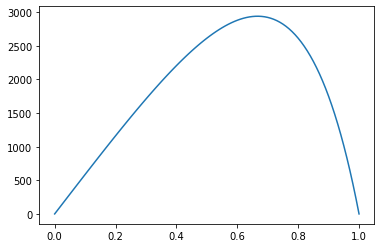

In [8]:
t = np.arange(0,1.01,0.01)
p = 14/(2-t)
Q = 1680*(1-t)/(2-t)
R = t*p*Q
plt.plot(t, R)